In [79]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import open3d as o3d 
import cv2


In [5]:
path = os.path.join(os.getcwd(), 'Data/training/1670409099.721037865.pcd')
print(path)

/home/parvez/Data/training/1670409099.721037865.pcd


In [11]:
points = np.asarray(o3d.io.read_point_cloud(path).points)


In [12]:
side_range=(-10, 10)     # left-most to right-most
fwd_range=(0, 20)       # back-most to forward-most

In [15]:
# EXTRACT THE POINTS FOR EACH AXIS
x_points = points[:, 0]
y_points = points[:, 1]
z_points = points[:, 2]

# FILTER - To return only indices of points within desired cube
# Three filters for: Front-to-back, side-to-side, and height ranges
# Note left side is positive y axis in LIDAR coordinates
f_filt = np.logical_and((x_points > fwd_range[0]), (x_points < fwd_range[1]))
s_filt = np.logical_and((y_points > -side_range[1]), (y_points < -side_range[0]))
filter = np.logical_and(f_filt, s_filt)
indices = np.argwhere(filter).flatten()
# KEEPERS
x_points = x_points[indices]
y_points = y_points[indices]
z_points = z_points[indices]


In [16]:
res = 0.05
# CONVERT TO PIXEL POSITION VALUES - Based on resolution
x_img = (-y_points / res).astype(np.int32)  # x axis is -y in LIDAR
y_img = (-x_points / res).astype(np.int32)  # y axis is -x in LIDAR

In [32]:
x_img -= int(np.floor(side_range[0] / res))
y_img += int(np.ceil(fwd_range[1] / res))

In [39]:
height_range = (-2, 0.5)  # bottom-most to upper-most
# CLIP HEIGHT VALUES - to between min and max heights
pixel_values = np.clip(a = z_points,
                           a_min=height_range[0],
                           a_max=height_range[1])


In [41]:
def scale_to_255(a, min, max, dtype=np.uint8):
    """ Scales an array of values from specified min, max range to 0-255
        Optionally specify the data type of the output (default is uint8)
    """
    return (((a - min) / float(max - min)) * 255).astype(dtype)

# RESCALE THE HEIGHT VALUES - to be between the range 0-255
pixel_values  = scale_to_255(pixel_values, min=height_range[0], max=height_range[1])

In [76]:
im = np.zeros((y_img.max()+1, x_img.max()+1), dtype=np.uint8)

In [77]:
for i in range(len(x_img)):
    a = y_img[i]
    b = x_img[i]
    im[a][b] = pixel_values[i]
    

In [82]:
 # CONVERT FROM NUMPY ARRAY TO A PIL IMAGE
from PIL import Image
im2 = Image.fromarray(im)
im2.show()   

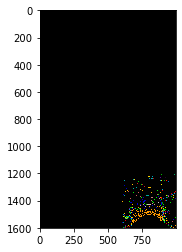

In [88]:
import matplotlib.pyplot as plt
plt.imshow(im, cmap="nipy_spectral", vmin=0, vmax=255)
plt.show()